In [17]:
import pandas as pd

history = pd.read_csv('data/unique_video_browsing_history_full_tiktok_data.csv')
likes = pd.read_csv('data/likes_full_tiktok_data.csv')
favorites = pd.read_csv('data/favorite_videos_full_tiktok_data.csv')
share = pd.read_csv('data/share_history_full_tiktok_data.csv')

In [8]:
# Visualization of Username in History table

# Assuming 'Username' is the column containing usernames in the history DataFrame
username_counts = history['Username'].value_counts().reset_index()

# Rename the columns for clarity
username_counts.columns = ['Username', 'Count']

# Sort the DataFrame based on the 'Username' column
sorted_username_counts = username_counts.sort_values(by='Count', ascending=False)

# Display the sorted and counted data
print(sorted_username_counts.head(50))

                     Username  Count
0              bradyyourtutor    432
1            melissamartins12    260
2          qsmp.brasil.clipes    243
3                  dylan.page    230
4                  disneyplus    230
5                   amberford    218
6              fernandahanzen    181
7                   lariehugo    169
8                   domixx007    158
9           harrymackofficial    156
10             shein_official    149
11                   nandoopg    148
12                qsmpcortes_    145
13                qsmp_clipes    143
14        McDonald's Portugal    139
15                   dicoonly    134
16             sonypicturespt    133
17                  yeahmadtv    120
18                       espn    119
19                  notprimak    116
20             barstoolsports    110
21              qsmp.cortesbr    110
22                   tiofrost    110
23                   imguestt    110
24             momentodelives    108
25      castrobrothersoficial    107
2

In [12]:
# Exclude rows where 'Song Name' contains the word 'original', count occurrences, and sort by count
filtered_song_counts = history[~history['Sound Name'].str.contains('original', case=False, na=False)]
song_counts = filtered_song_counts['Sound Name'].value_counts().reset_index()
song_counts.columns = ['Sound Name', 'Count']
sorted_song_counts = song_counts.sort_values(by='Count', ascending=False)

# Display the first 50 rows
print(sorted_song_counts.head(50))

                                           Sound Name  Count
0                                      Promoted Music   4024
1              Love You So - The King Khan & BBQ Show    496
2                         This sound isn't available.    323
3   Monkeys Spinning Monkeys - Kevin MacLeod & Kev...    172
4                   Tá OK - DENNIS & MC Kevin o Chris    125
5                              Aesthetic - Tollan Kim    105
6                             Quarto de hotel - Pdofz    104
7   Cupid – Twin Ver. (FIFTY FIFTY) – Sped Up Vers...     93
8   love song (hesitations) (sped up) - Lofuu & Sh...     89
9      Suspense, horror, piano and music box - takaya     84
10                 Papin - MC Kevin o Chris & MC CAJA     82
11  Witch Familiar (Classical) [Classic](143628) -...     74
12                                      Makeba - Jain     72
13  Forte Forte de Lacoste - Pra Começar o Final d...     69
14  Gol Bolinha, Gol Quadrado 2 - Mc Pedrinho & DJ...     68
15                 Vai N

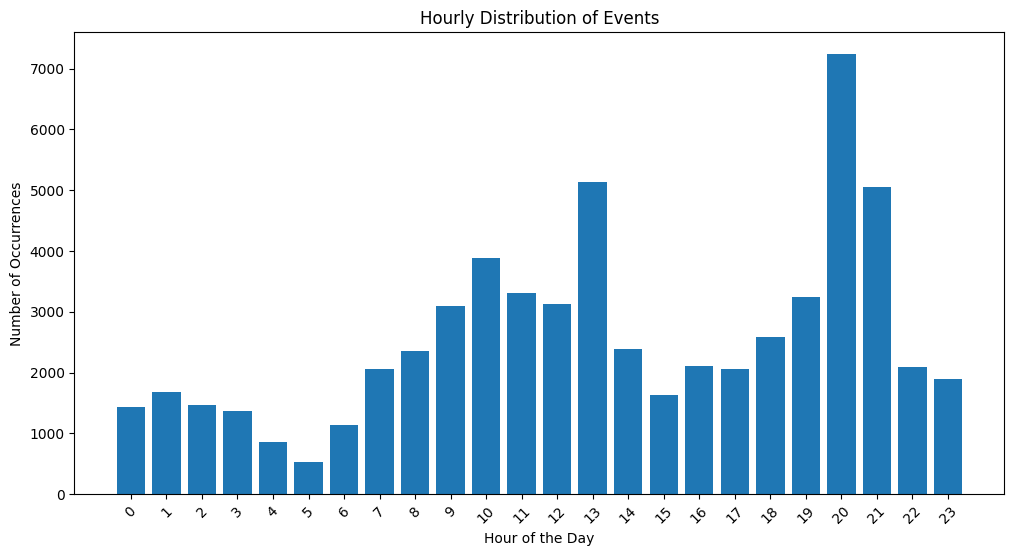

In [39]:
## Convert the 'Date' column to a datetime object
history['Date'] = pd.to_datetime(history['Date'])

## Extract the hour information
history['Hour'] = history['Date'].dt.hour

## Count the occurences of each hour
hourly_counts = history['Hour'].value_counts().sort_index()

## Plot an hourly graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.title('Hourly Distribution of Events')
plt.xticks(rotation=45)
plt.show()

In [78]:
## Visualization of Average time per day/month 

# Sort the DataFrame by 'Date'
history = history.sort_values(by='Date')

# Calculate session durations considering intervals longer than 2 minutes as separate sessions
session_threshold = pd.Timedelta(minutes=2)
history['SessionId'] = (history['Date'].diff() > session_threshold).cumsum()

# Calculate session durations in seconds and save the day of the session
session_durations = history.groupby('SessionId').agg(
    SessionDuration=('Date', lambda x: (x.max() - x.min()).total_seconds()),
    SessionDay=('Date', lambda x: x.min().strftime('%Y-%m-%d')),
    SessionMonth=('Date', lambda x: x.min().strftime('%Y-%m'))
)


# Calculate total duration per day
total_duration_per_day  = session_durations.groupby('SessionDay').agg(
    Duration=('SessionDuration', lambda x: x.sum() / 3600)
)

print(total_duration_per_day)

# Calculate total duration per month
total_duration_per_month = session_durations.groupby('SessionMonth').agg(
    Duration=('SessionDuration', lambda x: x.sum() / 3600)
)

print(total_duration_per_month)


            Duration
SessionDay          
2023-04-02  1.111667
2023-04-03  1.730000
2023-04-04  2.016389
2023-04-05  1.018889
2023-04-06  0.685278
...              ...
2023-09-17  2.098889
2023-09-18  1.351667
2023-09-19  0.865556
2023-09-20  1.203056
2023-09-28  0.073611

[170 rows x 1 columns]
               Duration
SessionMonth           
2023-04       28.724444
2023-05       27.243889
2023-06       42.673056
2023-07       41.181667
2023-08       49.047778
2023-09       28.179722


<Figure size 1200x600 with 0 Axes>

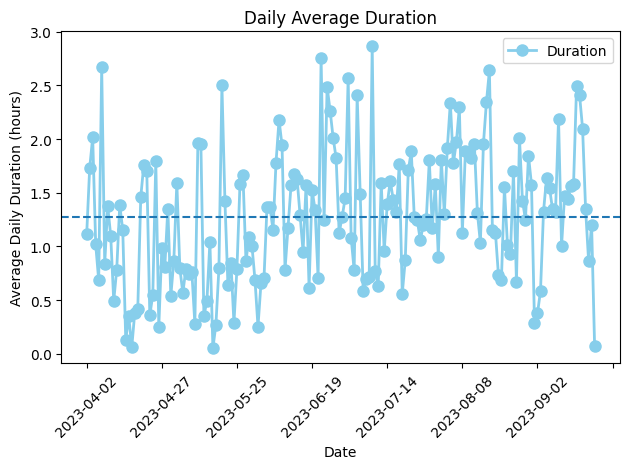

<Figure size 1200x600 with 0 Axes>

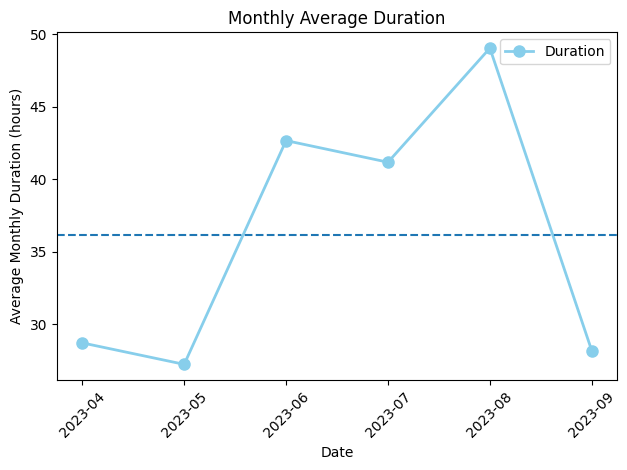

In [86]:

import numpy as np

# Visualize daily average session durations
plt.figure(figsize=(12, 6))
total_duration_per_day.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Average Daily Duration (hours)')
plt.title('Daily Average Duration')
plt.axhline(y=np.nanmean(total_duration_per_day.Duration),linestyle="--", label='Avg')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualize monthly average session durations
plt.figure(figsize=(12, 6))
total_duration_per_month.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Average Monthly Duration (hours)')
plt.title('Monthly Average Duration')
plt.axhline(y=np.nanmean(total_duration_per_month.Duration),linestyle="--")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

